# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nurrizky Arum Jatmiko
- **Email:** nurrizkyaj.core@gmail.com
- **ID Dicoding:** nurrizkyarumjatmiko

## Menentukan Pertanyaan Bisnis

1. Berapa rata-rata jumlah pengguna sepeda pada hari kerja dibandingkan dengan hari libur?
2. Bagaimana suhu mempengaruhi jumlah pengguna sepeda harian?

## Import Semua Packages/Library yang Digunakan

In [241]:
#Mengimpor library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [242]:
#Membaca dataset
day_df = pd.read_csv('data/day.csv')

In [243]:
#Menampilkan dua puluh baris pertama
day_df.head(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


**Insight:**

Dataset day.csv berisi data mengenai penggunaan sepeda harian dari sistem bike-sharing. Berikut adalah deskripsi dari kolom-kolom yang ada:

1. instant: ID unik untuk setiap baris.
2. dteday: Tanggal observasi.
3. Season dalam setahun, diwakili dengan angka:
* 1: Musim Semi
* 2: Musim Panas
* 3: Musim Gugur
* 4: Musim Dingin
4. yr: Tahun, dengan 0 untuk tahun 2011 dan 1 untuk tahun 2012.
5. mnth: Bulan dalam setahun (1 hingga 12).
6. holiday: Apakah hari tersebut merupakan hari libur (1 jika hari libur, 0 jika tidak).
7. weekday: Hari dalam minggu (0 - 6, di mana 0 adalah Minggu)..
8. workingday: Apakah hari tersebut merupakan hari kerja (1 jika hari kerja, 0 jika tidak).
9. weathersit: Kondisi cuaca, diwakili dengan angka:
* 1: Cuaca cerah atau sedikit mendung.
* 2: Cuaca berkabut atau mendung.
* 3: Hujan ringan atau salju ringan.
* 4: Hujan deras, badai, atau salju lebat.
10. temp: Suhu normalisasi, nilai antara 0 hingga 1.
11. atemp: Suhu terasa atau suhu yang dirasakan, nilai antara 0 hingga 1.
12. hum: Kelembaban, nilai antara 0 hingga 1.
13. windspeed: Kecepatan angin, nilai antara 0 hingga 1.
14. casual: Jumlah pengguna sepeda non-terdaftar.
15. registered: Jumlah pengguna sepeda terdaftar.
16. cnt: Jumlah total pengguna sepeda (penjumlahan dari casual dan registered).

Dataset ini menyediakan informasi yang dapat digunakan untuk menganalisis tren penggunaan sepeda berdasarkan berbagai faktor seperti musim, cuaca, dan waktu.


### Assessing Data

**Menilai tabel `df_day`**

In [244]:
#Cek informasi
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None


In [245]:
#Mengecek missing values
missing_values = day_df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [246]:
#Mengecek duplikasi data
print(day_df.duplicated().sum())

0


In [247]:
#Tampilkan beberapa info statistik
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [248]:
#Mengecek apakah ada inaccurate data
invalid_cnt = day_df[day_df['cnt'] < 0]
print(f"Jumlah total pengguna sepeda yang tidak akurat (negatif): {len(invalid_cnt)}")

Jumlah total pengguna sepeda yang tidak akurat (negatif): 0


In [249]:
#Cek outliers pada kolom 'cnt' menggunakan IQR Method
#Menghitung Q1 dan Q3 untuk kolom 'cnt'
Q1 = day_df['cnt'].quantile(0.25)
Q3 = day_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

In [250]:
#Menghitung batas bawah dan batas atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

**Insight:**
1. Tidak ditemukan **missing values**, **duplikasi data**, atau **outliers** pada kolom target `cnt`, sehingga data bersih.
   
2. Sebagian besar variabel memiliki tipe data yang sesuai, kecuali kolom **`dteday`**, yang bisa diubah dari tipe **object** ke **datetime** untuk memudahkan analisis.

### Cleaning Data

In [251]:
#Mengubah tipe data pada 'dteday' ke format datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [252]:
#Cek data setelah diubah
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [253]:
#Tampilkan beberapa info statistik
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
1. Dalam proses ini, kolom `dteday` diubah dari tipe object menjadi datetime untuk memudahkan analisis.

## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [254]:
#Menampilkan deskripsi semua statistik
print(day_df.describe(include="all"))

          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000    0.000000    0.000000    1.000000 

In [255]:
# Tampilkan 20 baris sampel acak
day_df.sample(20)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
461,462,2012-04-06,2,1,4,0,5,1,1,0.403333,0.390767,0.377083,0.300388,1807,4653,6460
363,364,2011-12-30,1,0,12,0,5,1,1,0.311667,0.318812,0.636667,0.134337,491,2508,2999
433,434,2012-03-09,1,1,3,0,5,1,2,0.410833,0.397083,0.407083,0.414800,447,4122,4569
380,381,2012-01-16,1,1,1,1,1,0,1,0.190000,0.190663,0.522500,0.231358,217,2081,2298
179,180,2011-06-29,3,0,6,0,3,1,1,0.728333,0.654688,0.497917,0.261821,848,4377,5225
210,211,2011-07-30,3,0,7,0,6,0,1,0.804167,0.728537,0.465833,0.168537,1559,2916,4475
523,524,2012-06-07,2,1,6,0,4,1,1,0.602500,0.569442,0.567083,0.157350,1038,6456,7494
155,156,2011-06-05,2,0,6,0,0,0,2,0.648333,0.616804,0.652500,0.138692,1685,3221,4906
57,58,2011-02-27,1,0,2,0,0,0,1,0.343478,0.351109,0.680000,0.125248,694,1708,2402
129,130,2011-05-10,2,0,5,0,2,1,1,0.532500,0.522721,0.489167,0.115671,694,4109,4803


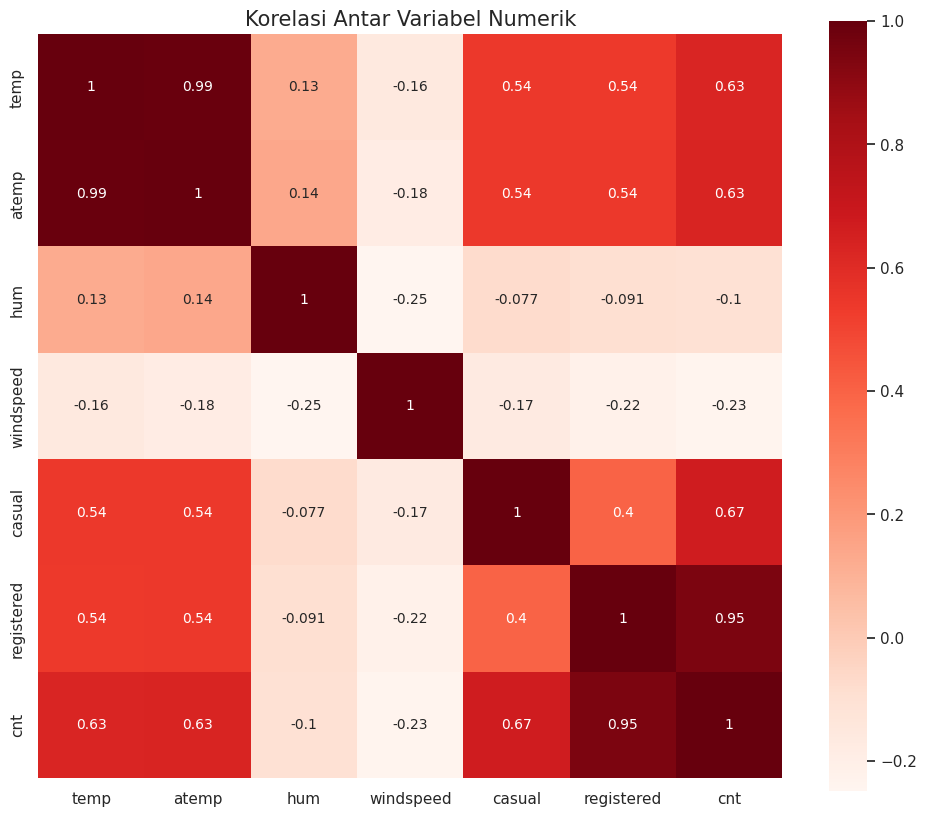

In [256]:
# Menemukan korelasi
correlation_values = day_df[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_values, cbar=True, square=True, annot=True, annot_kws={'size': 10}, cmap='Reds')

# Menambahkan judul
plt.title('Korelasi Antar Variabel Numerik', fontsize=15)

# Menampilkan heatmap
plt.show()


**Insight:**
1. Dataset **day_df** memiliki berbagai variasi nilai dalam setiap fiturnya.
2. Statistik seperti **mean**, **min**, **max**, dan **quartiles** memberikan gambaran tentang distribusi dan rentang nilai di setiap kolom.
3. Heatmap digunakan untuk melihat korelasi antar variabel numerik, yang akan membantu menjawab pertanyaan bisnis.
4. Setiap kolom memiliki jumlah nilai unik yang berbeda, menunjukkan adanya fitur kategori (seperti **season**, **weekday**, dll.) serta fitur numerik yang menyediakan informasi penting tentang penggunaan sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa rata-rata jumlah pengguna sepeda pada hari kerja dibandingkan dengan hari libur?

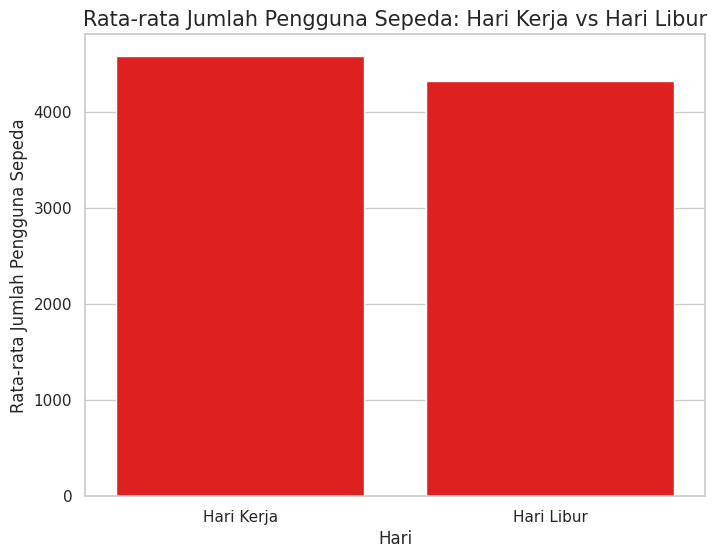

Rata-rata jumlah pengguna sepeda pada hari kerja adalah 4584.82 orang.
Rata-rata jumlah pengguna sepeda pada hari libur adalah 4330.17 orang.


In [257]:
# Menambahkan kolom untuk memisahkan hari kerja dan hari libur
day_df['Hari'] = day_df['workingday'].apply(lambda x: 'Hari Kerja' if x == 1 else 'Hari Libur')

# Menghitung rata-rata jumlah pengguna sepeda untuk hari kerja dan hari libur
working_day_avg = day_df[day_df['workingday'] == 1]['cnt'].mean()
holiday_avg = day_df[day_df['workingday'] == 0]['cnt'].mean()

# Membuat DataFrame baru untuk visualisasi
avg_df = pd.DataFrame({
    'Hari': ['Hari Kerja', 'Hari Libur'],
    'Rata-rata Pengguna': [working_day_avg, holiday_avg]
})

# Visualisasi Barplot
plt.figure(figsize=(8,6))
sns.barplot(data=avg_df, x='Hari', y='Rata-rata Pengguna', color='red')
plt.title('Rata-rata Jumlah Pengguna Sepeda: Hari Kerja vs Hari Libur', fontsize=15)
plt.ylabel('Rata-rata Jumlah Pengguna Sepeda')
plt.show()

# Menambahkan output teks
print(f"Rata-rata jumlah pengguna sepeda pada hari kerja adalah {working_day_avg:.2f} orang.")
print(f"Rata-rata jumlah pengguna sepeda pada hari libur adalah {holiday_avg:.2f} orang.")

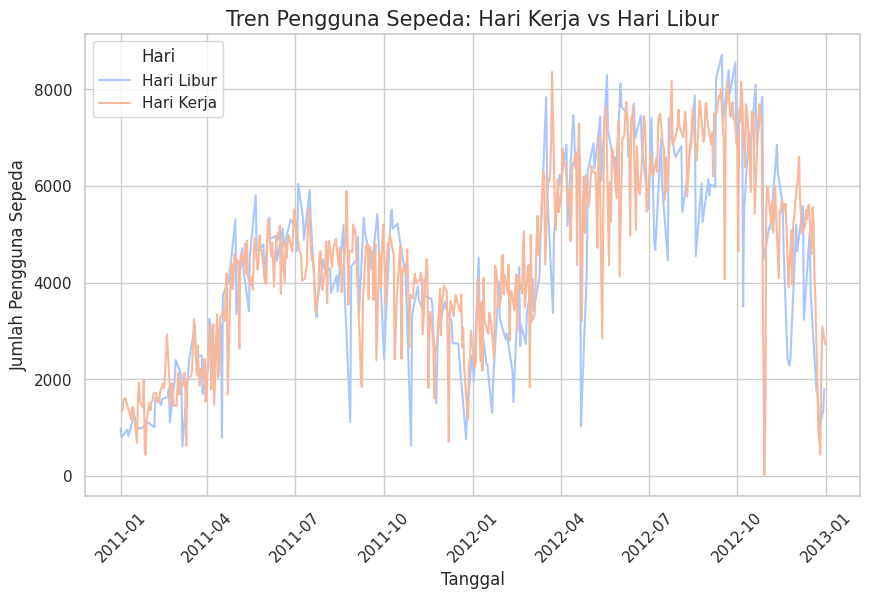

Terdapat 500 hari kerja dan 231 hari libur dalam dataset.


In [258]:
import warnings

# Menonaktifkan FutureWarning
warnings.simplefilter(action='ignore', category=FutureWarning)

# Line plot untuk tren pengguna sepeda berdasarkan hari kerja dan hari libur
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
plt.figure(figsize=(10,6))
sns.lineplot(data=day_df, x='dteday', y='cnt', hue='Hari', palette='coolwarm')
plt.title('Tren Pengguna Sepeda: Hari Kerja vs Hari Libur', fontsize=15)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xlabel('Tanggal')
plt.xticks(rotation=45)
plt.show()

# Menambahkan output teks
total_working_days = len(day_df[day_df['workingday'] == 1])
total_holidays = len(day_df[day_df['workingday'] == 0])
print(f"Terdapat {total_working_days} hari kerja dan {total_holidays} hari libur dalam dataset.")

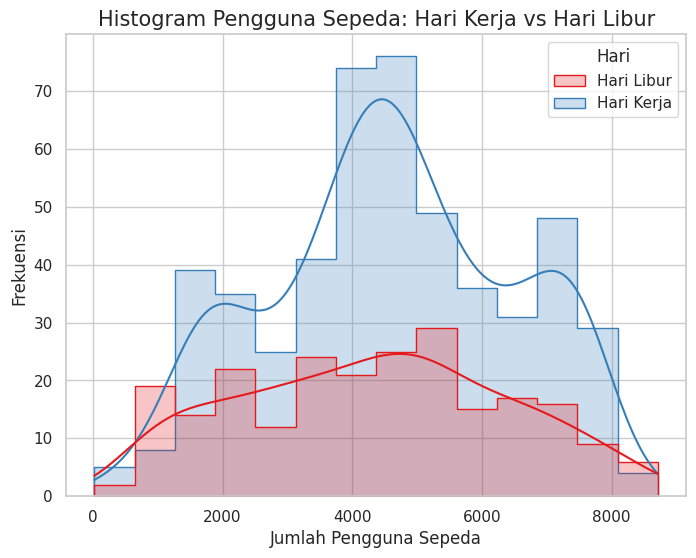

In [259]:
plt.figure(figsize=(8,6))
sns.histplot(data=day_df, x='cnt', hue='Hari', element='step', kde=True, palette='Set1')
plt.title('Histogram Pengguna Sepeda: Hari Kerja vs Hari Libur', fontsize=15)
plt.ylabel('Frekuensi')
plt.xlabel('Jumlah Pengguna Sepeda')
plt.show()

**Insight:**

1. **Penggunaan Sepeda yang Lebih Tinggi pada Hari Kerja**: Rata-rata jumlah pengguna sepeda lebih tinggi pada hari kerja (4,584.82 orang) dibandingkan dengan hari libur (4,330.17 orang), menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi di hari kerja.

2. **Fluktuasi pada Hari Libur**: Meskipun rata-rata penggunaan sepeda di hari libur masih cukup signifikan, terdapat fluktuasi yang lebih besar dalam jumlah pengguna sepeda. Hal ini dapat disebabkan oleh faktor eksternal seperti cuaca atau kegiatan rekreasi yang mempengaruhi keputusan untuk bersepeda.

3. **Frekuensi Pengguna Sepeda yang Tinggi**: Histogram menunjukkan bahwa pada hari kerja, lebih banyak hari tercatat dengan jumlah pengguna sepeda yang tinggi, sedangkan pada hari libur, frekuensi hari dengan jumlah pengguna sepeda sangat tinggi cenderung lebih rendah, menunjukkan ketidakstabilan penggunaan sepeda di hari libur.

### Pertanyaan 2: Bagaimana suhu mempengaruhi jumlah pengguna sepeda harian?

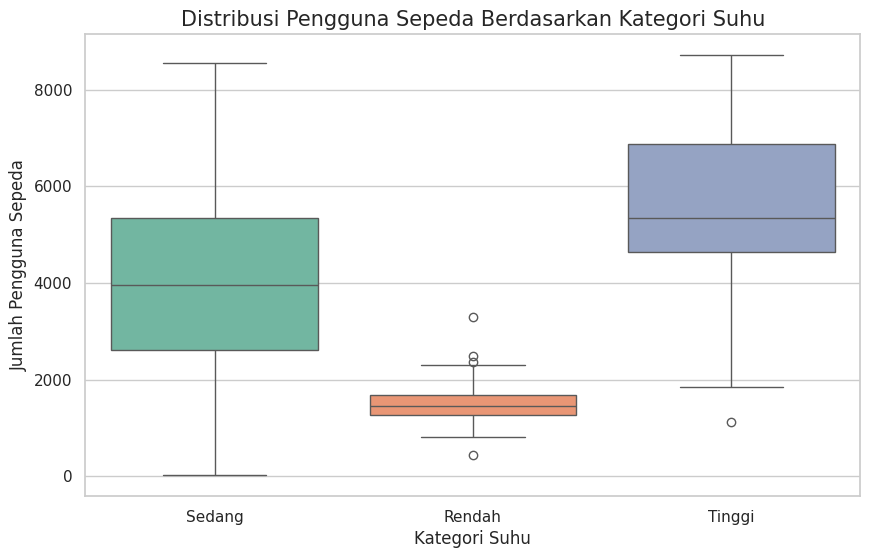

In [260]:
# Menentukan kategori suhu
def categorize_temp(temp):
    if temp < 0.2:
        return 'Rendah'
    elif 0.2 <= temp < 0.6:
        return 'Sedang'
    else:
        return 'Tinggi'

day_df['Temp Kategori'] = day_df['temp'].apply(categorize_temp)

plt.figure(figsize=(10, 6))
sns.boxplot(data=day_df, x='Temp Kategori', y='cnt', palette='Set2')
plt.title('Distribusi Pengguna Sepeda Berdasarkan Kategori Suhu', fontsize=15)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xlabel('Kategori Suhu')
plt.show()

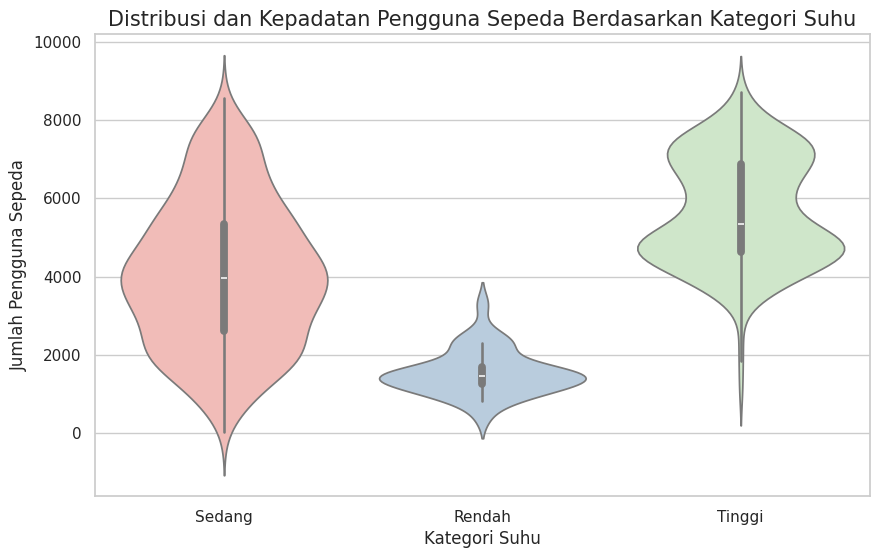

In [261]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=day_df, x='Temp Kategori', y='cnt', palette='Pastel1')
plt.title('Distribusi dan Kepadatan Pengguna Sepeda Berdasarkan Kategori Suhu', fontsize=15)
plt.ylabel('Jumlah Pengguna Sepeda')
plt.xlabel('Kategori Suhu')
plt.show()

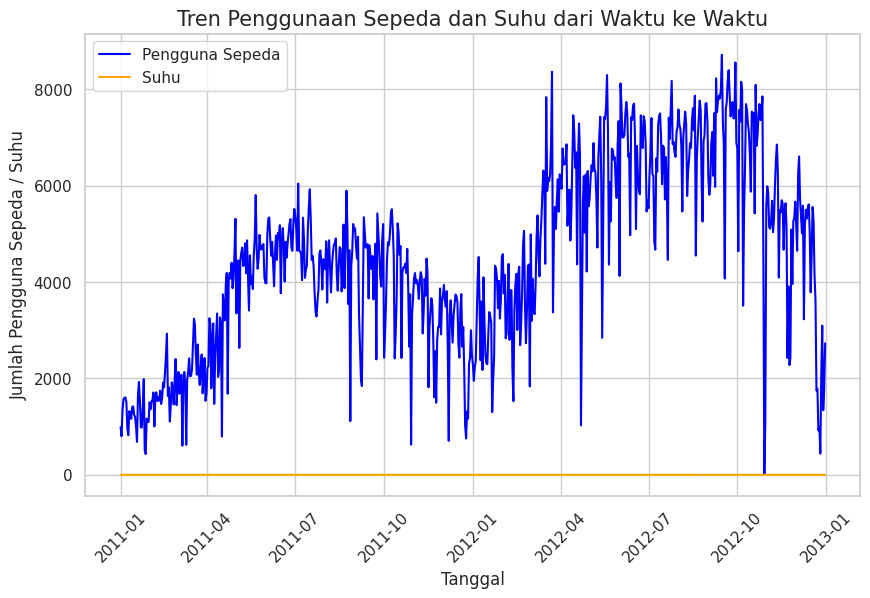

In [262]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=day_df, x='dteday', y='cnt', label='Pengguna Sepeda', color='blue')
sns.lineplot(data=day_df, x='dteday', y='temp', label='Suhu', color='orange')
plt.title('Tren Penggunaan Sepeda dan Suhu dari Waktu ke Waktu', fontsize=15)
plt.ylabel('Jumlah Pengguna Sepeda / Suhu')
plt.xlabel('Tanggal')
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Insight:**


1. **Distribusi Berdasarkan Kategori Suhu**: Boxplot menunjukkan bahwa pada kategori suhu tinggi, terdapat rentang pengguna sepeda yang lebih luas, mengindikasikan bahwa suhu yang lebih hangat dapat mendorong variasi penggunaan sepeda. Sebaliknya, pada suhu rendah, jumlah pengguna sepeda cenderung sedikit dan terdistribusi lebih sempit, mencerminkan bahwa kondisi dingin mengurangi minat untuk bersepeda.

2. **Kepadatan Pengguna pada Suhu Sedang**: Violin plot memperlihatkan bahwa pada suhu sedang, terdapat kepadatan pengguna sepeda yang lebih tinggi. Ini menunjukkan bahwa suhu yang nyaman cenderung menarik lebih banyak orang untuk menggunakan sepeda sebagai pilihan transportasi.

3. **Tren Musiman**: Line plot mengungkapkan adanya korelasi positif antara suhu dan jumlah pengguna sepeda. Peningkatan suhu sejalan dengan peningkatan jumlah pengguna, menegaskan pola musiman di mana penggunaan sepeda meningkat selama bulan-bulan yang lebih hangat.

## Analisis Lanjutan (Opsional)

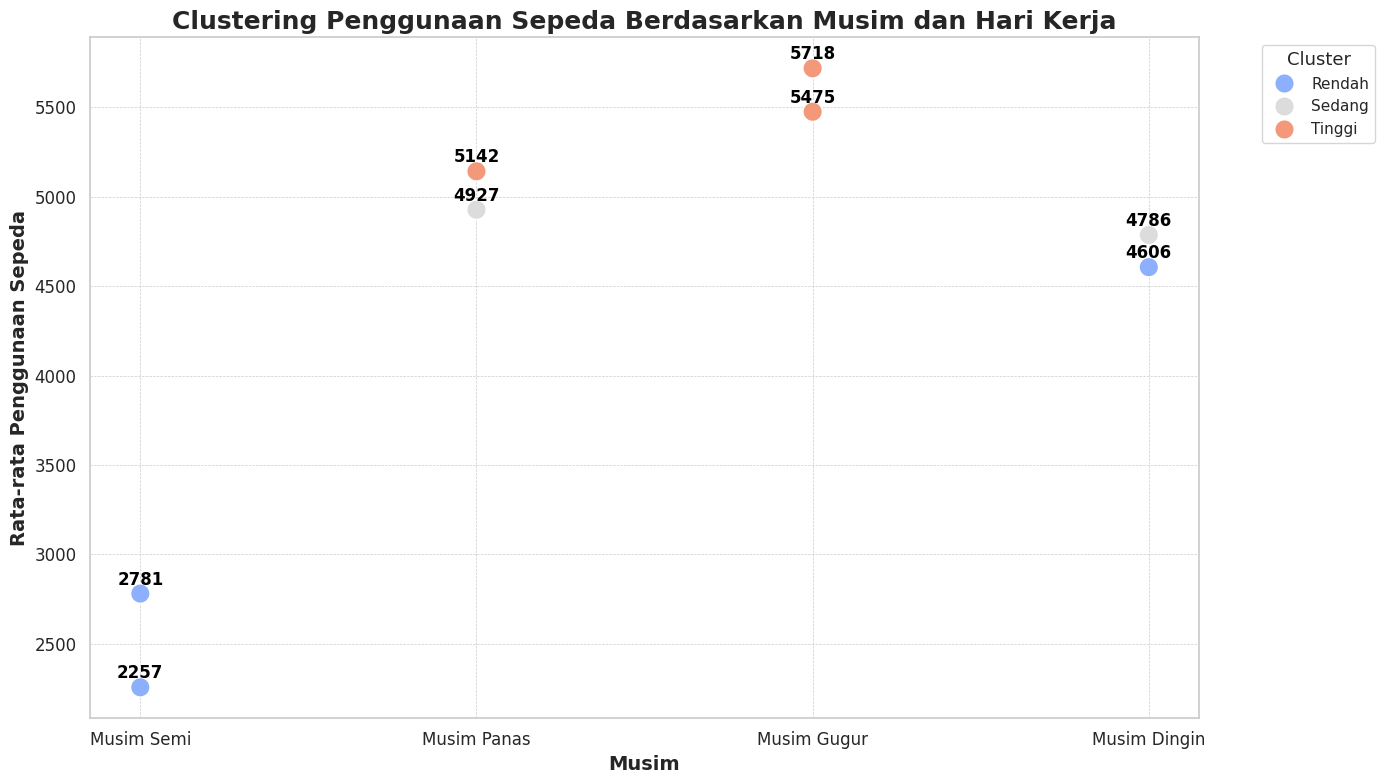

In [263]:
# Set style yang lebih modern dan menarik
sns.set(style='whitegrid', palette='muted')

# Membuat plot dengan peningkatan visual
plt.figure(figsize=(14, 8))
scatter_plot = sns.scatterplot(
    data=usage_summary,
    x='season',
    y='cnt',
    hue='Cluster',
    palette='coolwarm',
    s=200,  # Ukuran titik lebih besar
    legend='full'
)

# Menambahkan anotasi pada setiap titik dengan nilai penggunaan sepeda
for i in range(usage_summary.shape[0]):
    plt.text(
        usage_summary['season'][i],
        usage_summary['cnt'][i] + 50,  # Sedikit di atas titik
        usage_summary['cnt'][i],
        horizontalalignment='center',
        size='medium',
        color='black',
        weight='semibold'
    )

# Menambahkan informasi visual tambahan
plt.title('Clustering Penggunaan Sepeda Berdasarkan Musim dan Hari Kerja', fontsize=18, weight='bold')
plt.xlabel('Musim', fontsize=14, weight='bold')
plt.ylabel('Rata-rata Penggunaan Sepeda', fontsize=14, weight='bold')
plt.xticks(ticks=range(len(season_order)), labels=season_order, fontsize=12)
plt.yticks(fontsize=12)

# Mengatur posisi legenda di luar grafik agar tidak menghalangi
plt.legend(title='Cluster', title_fontsize='13', fontsize='11', bbox_to_anchor=(1.05, 1), loc='upper left')

# Tampilkan plot dengan grid yang halus
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

**Insight:**
1. Cuaca dan musim mempengaruhi pola bersepeda: Musim panas dan gugur adalah periode puncak bersepeda, sementara musim dingin dan semi menunjukkan penggunaan lebih rendah. Hal ini bisa dikaitkan dengan kondisi cuaca yang lebih mendukung di musim panas dan gugur.
2. Aktivitas di hari kerja lebih teratur: Pada musim dingin, meskipun suhu lebih rendah, lebih banyak orang bersepeda pada hari kerja, kemungkinan besar karena keperluan transportasi.


## Conclusion

1. Conclution pertanyaan 1
- Sepeda lebih sering digunakan sebagai alat transportasi pada hari kerja, dengan rata-rata jumlah pengguna mencapai 4,584.82 orang, dibandingkan dengan 4,330.17 orang pada hari libur. Meskipun penggunaan sepeda pada hari libur tetap signifikan, terdapat fluktuasi yang lebih besar yang dapat dipengaruhi oleh faktor eksternal seperti cuaca atau kegiatan rekreasi. Selain itu, histogram mengindikasikan bahwa pada hari kerja, lebih banyak hari mencatat jumlah pengguna sepeda yang tinggi, sedangkan pada hari libur, frekuensi hari dengan penggunaan sangat tinggi cenderung lebih rendah, mencerminkan ketidakstabilan penggunaan sepeda di hari libur.
2.  Conclution pertanyaan 2
- Distribusi pengguna sepeda berdasarkan kategori suhu menunjukkan bahwa suhu berperan penting dalam memengaruhi tingkat penggunaan sepeda. Boxplot mengindikasikan bahwa pada kategori suhu tinggi, terdapat variasi yang lebih besar dalam jumlah pengguna, yang menunjukkan bahwa suhu hangat dapat mendorong lebih banyak orang untuk bersepeda. Di sisi lain, suhu rendah cenderung mengurangi minat bersepeda, dengan distribusi yang lebih sempit. Violin plot menunjukkan kepadatan pengguna yang lebih tinggi pada suhu sedang, menandakan bahwa suhu yang nyaman menarik lebih banyak pengguna. Selain itu, line plot mengungkapkan adanya korelasi positif antara suhu dan jumlah pengguna sepeda, dengan peningkatan suhu yang berbanding lurus dengan peningkatan penggunaan sepeda, menegaskan pola musiman di mana aktivitas bersepeda meningkat selama bulan-bulan yang lebih hangat.
3. Conclution analisis lanjutan
- Analisis menunjukkan bahwa cuaca dan musim memiliki pengaruh signifikan terhadap pola bersepeda, dengan musim panas dan gugur sebagai periode puncak penggunaan sepeda, sementara musim dingin dan semi menunjukkan tingkat penggunaan yang lebih rendah, kemungkinan disebabkan oleh kondisi cuaca yang lebih mendukung selama musim hangat. Selain itu, meskipun suhu lebih rendah di musim dingin, aktivitas bersepeda pada hari kerja cenderung lebih teratur, mencerminkan bahwa banyak orang menggunakan sepeda sebagai alat transportasi harian, yang menunjukkan pentingnya perencanaan infrastruktur dan kebijakan transportasi yang mendukung penggunaan sepeda di semua musim.